#### 1. Import both csv files (Customer data, transaction data) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
transactions_df=pd.read_csv("Transactions_Data.csv")
customer_df=pd.read_csv("customers_Data.csv")

In [4]:
transactions_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Flavour,Category
0,01-Jan-23,269,269175,266094,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips
1,01-Jan-23,153,153187,152684,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips
2,01-Jan-23,123,123299,127308,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips
3,01-Jan-23,238,238186,242612,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips
4,01-Jan-23,144,144001,143893,28,Thins Potato Chips Hot & Spicy 175g,2,$6.60,175g,Thin Chips,Spicy,Chips
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,31-Dec-23,103,103477,103645,88,Kettle Honey Soy Chicken 175g,1,$5.40,175g,Kettle,Chicken,Kettle
264830,31-Dec-23,216,216213,215589,102,Kettle Mozzarella Basil & Pesto 175g,1,$5.40,175g,Kettle,Pesto,Kettle
264831,31-Dec-23,214,214235,213837,102,Kettle Mozzarella Basil & Pesto 175g,1,$5.40,175g,Kettle,Pesto,Kettle
264832,31-Dec-23,145,145116,145327,36,Kettle Chilli 175g,1,$5.40,175g,Kettle,Chilli,Kettle


In [5]:
customer_df

,LYLTY_CARD_NBR,Lifestage,PREMIUM_CUSTOMER
0,1004,OLDER SINGLES/COUPLES,Mainstream
1,1011,OLDER SINGLES/COUPLES,Mainstream
2,1011,OLDER SINGLES/COUPLES,Mainstream
3,1011,OLDER SINGLES/COUPLES,Mainstream
4,1019,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...
264831,271236,NEW FAMILIES,Premium
264832,272259,NEW FAMILIES,Premium
264833,272275,NEW FAMILIES,Premium
264834,272318,NEW FAMILIES,Premium


#### 2.Perform detailed data checks (missing values, outliers, duplicates, special characters ($, #, #NA, #error, #Name, Currencies, Null values,?,@ Inf, -inf, #error,  #value…etc…), mis-match in data types, renaming required for variables, format of data (specially dates), Identify unique id/Unique identifier or key variables (primary key/foreign key)  in the data, is data encoded etc...). List out all possible problems in the data 

#### Data Auditing

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   LYLTY_CARD_NBR    264836 non-null  int64 
 1   Lifestage         264836 non-null  object
 2   PREMIUM_CUSTOMER  264836 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.1+ MB


In [7]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   DATE            264834 non-null  object
 1   STORE_NBR       264834 non-null  int64 
 2   LYLTY_CARD_NBR  264834 non-null  int64 
 3   TXN_ID          264834 non-null  int64 
 4   PROD_NBR        264834 non-null  int64 
 5   PROD_NAME       264834 non-null  object
 6   PROD_QTY        264834 non-null  int64 
 7   TOT_SALES       264834 non-null  object
 8   Weight          264834 non-null  object
 9   Brand           264834 non-null  object
 10  Flavour         264834 non-null  object
 11  Category        264834 non-null  object
dtypes: int64(5), object(7)
memory usage: 24.2+ MB


#### Null Values

In [8]:
customer_df.isnull().sum()

LYLTY_CARD_NBR      0
Lifestage           0
PREMIUM_CUSTOMER    0
dtype: int64

In [10]:
transactions_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
Weight            0
Brand             0
Flavour           0
Category          0
dtype: int64

#### Outliers

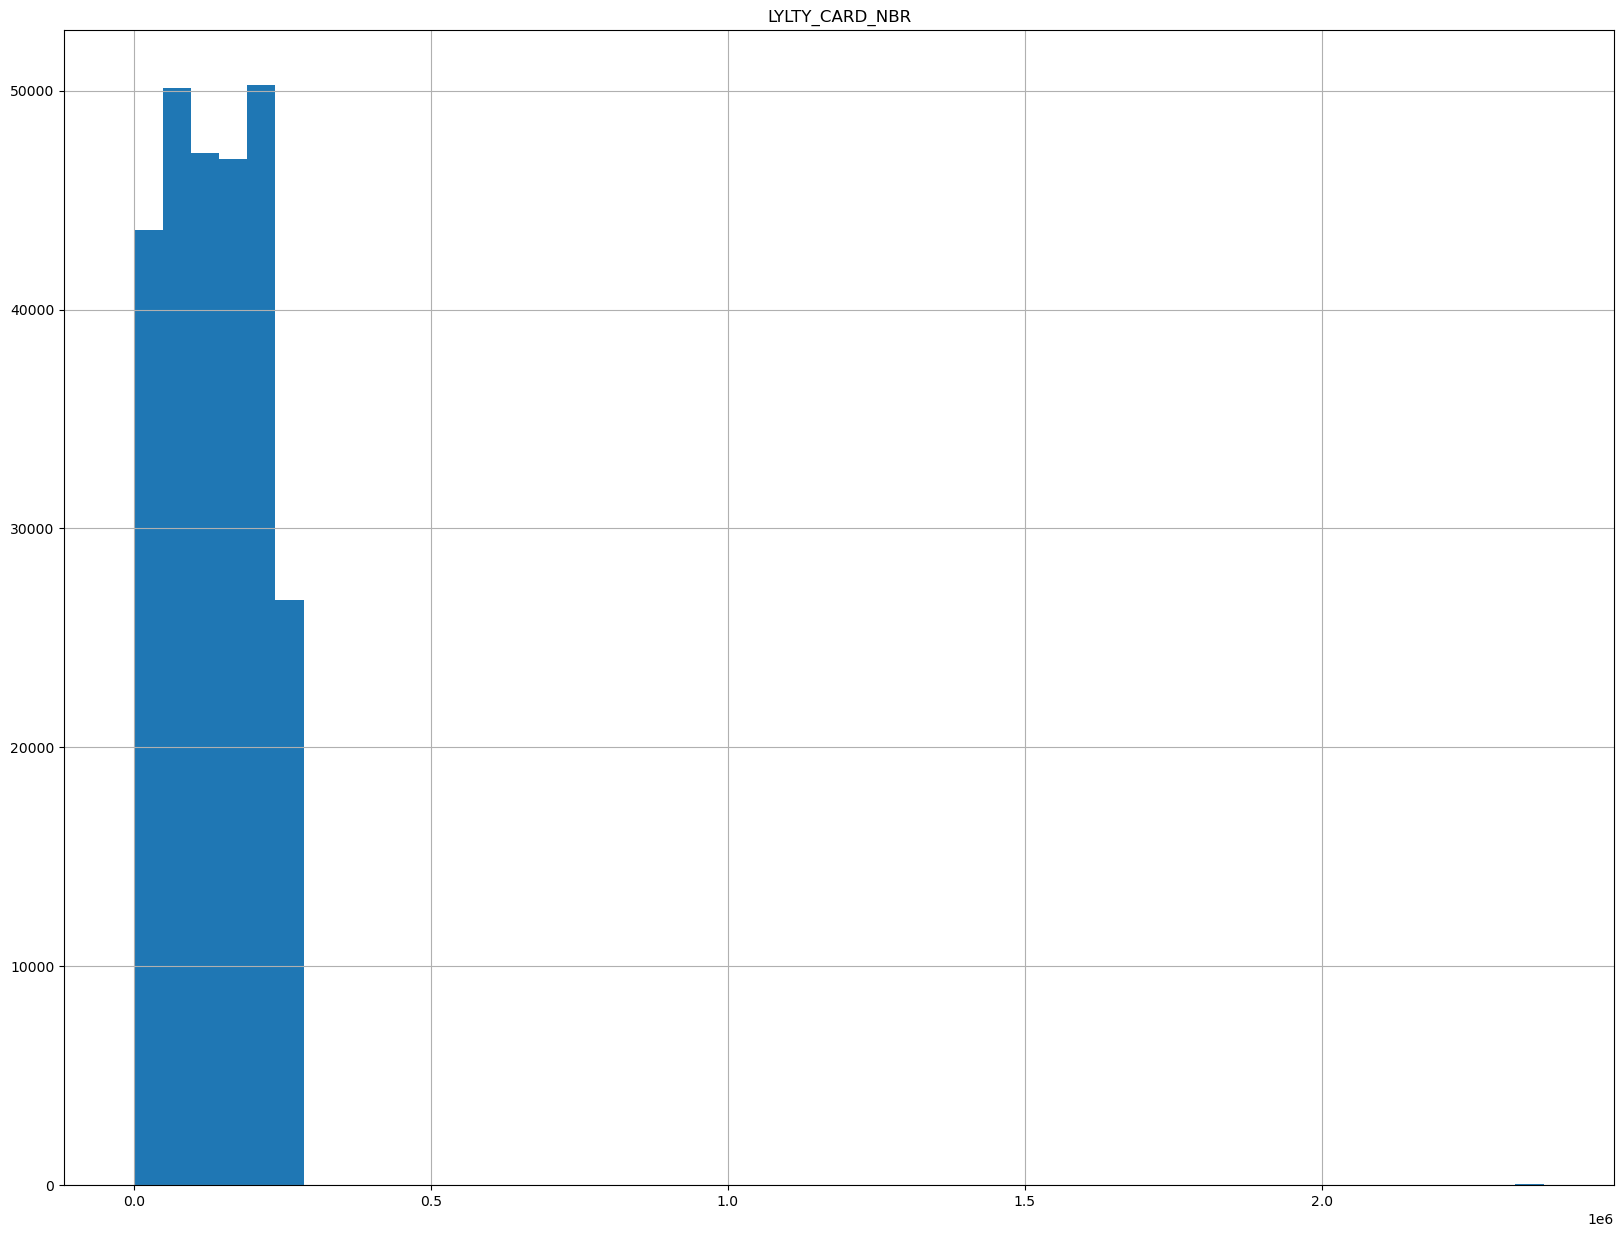

In [11]:
customer_df.hist(bins=50, figsize=(20,15))
plt.show()


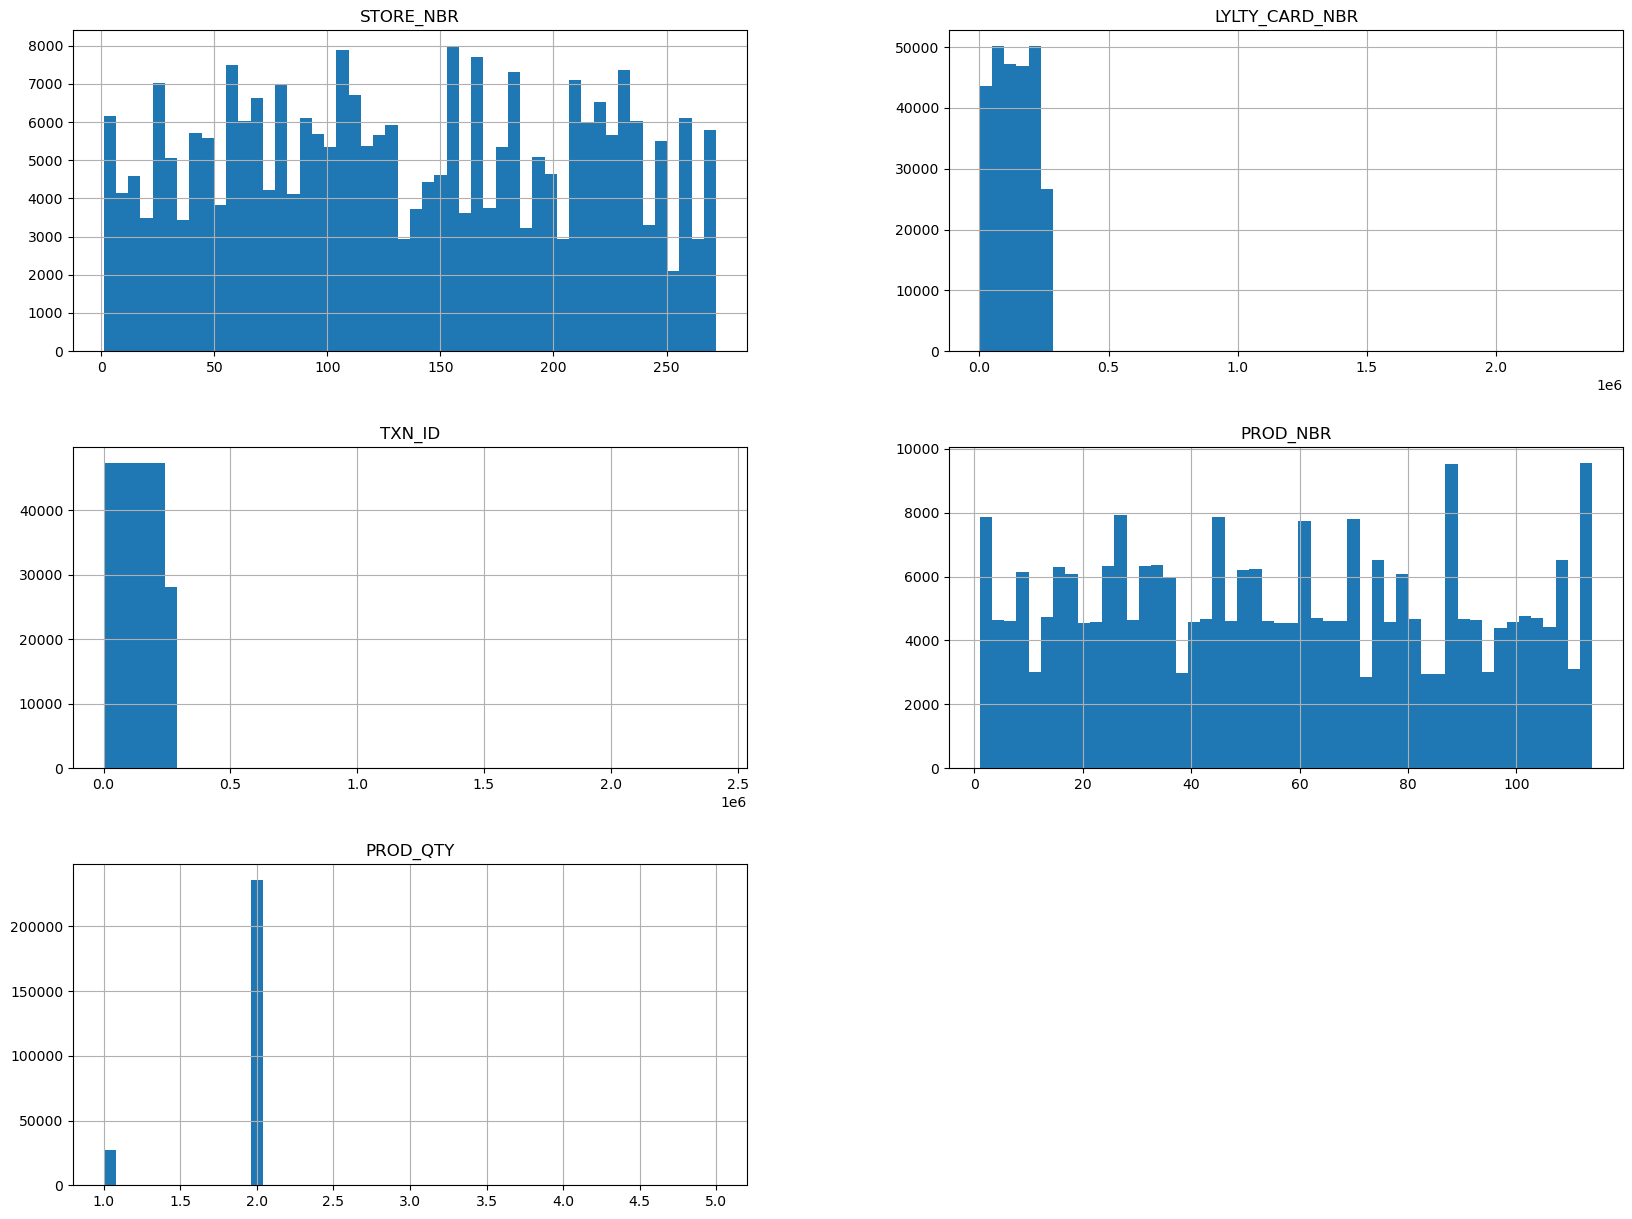

In [12]:
transactions_df.hist(bins=50, figsize=(20,15))
plt.show()

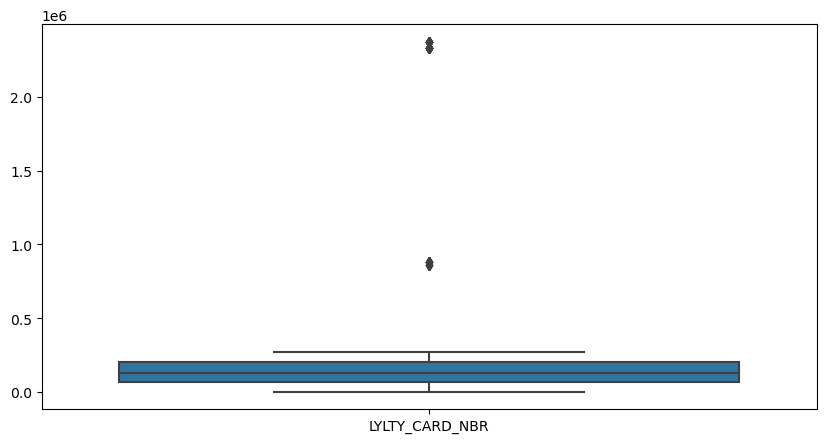

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=customer_df)
plt.show()

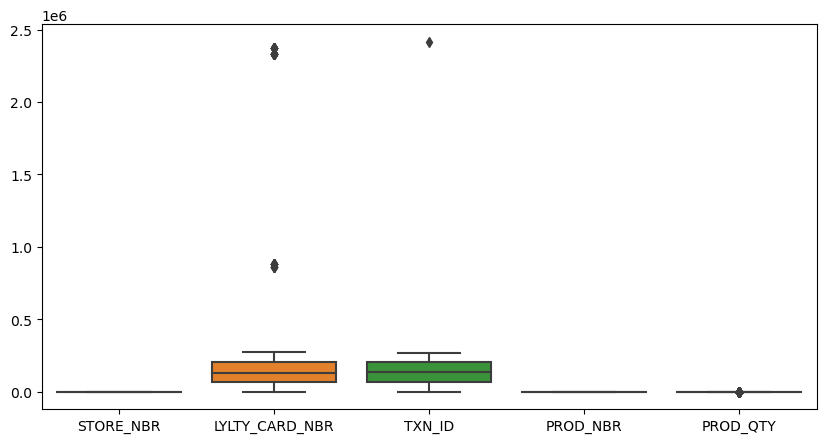

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=transactions_df)
plt.show()

#### Duplicates

In [15]:
customer_df.duplicated().sum()
print("duplicated count of customers:",customer_df.duplicated().sum())

duplicated count of customers: 121998


In [26]:
customer_df = customer_df.drop_duplicates(subset='LYLTY_CARD_NBR', keep='first')

In [27]:
customer_df.duplicated().sum()
print("duplicated count of customers:",customer_df.duplicated().sum())

duplicated count of customers: 0


In [16]:
transactions_df.duplicated().sum()
print("duplicated count of transactions:",transactions_df.duplicated().sum())

duplicated count of transactions: 1


In [28]:
transactions_df = transactions_df.drop_duplicates(subset='LYLTY_CARD_NBR', keep='first')

In [29]:
transactions_df.duplicated().sum()
print("duplicated count of transactions:",transactions_df.duplicated().sum())

duplicated count of transactions: 0


#### Special Characters and Incorrect Data Entries

In [17]:
transactions_df['TOT_SALES'].str.contains(r'[$,#,@,&]').sum()

264834

In [18]:
transactions_df['Weight'].str.contains(r'[$,#,@,&]').sum()

0

In [19]:
transactions_df["TOT_SALES"]=transactions_df["TOT_SALES"].replace({"\$":""},regex=True).astype(float)

In [20]:
transactions_df['Weight'] = transactions_df['Weight'].str.replace('g', '').astype(int)

##### "$" from  TOT_SALES and "g" from Weight is removed

#### Data Type Mismatches

In [22]:
transactions_df['DATE'] = pd.to_datetime(transactions_df['DATE'], errors='coerce')

In [30]:
transactions_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Flavour,Category
0,2023-01-01,269,269175,266094,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175,Thin Chips,Spicy,Chips
1,2023-01-01,153,153187,152684,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175,Thin Chips,Spicy,Chips
2,2023-01-01,123,123299,127308,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175,Thin Chips,Spicy,Chips


#### Checking dataypes

In [31]:
transactions_df.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
Weight                     int32
Brand                     object
Flavour                   object
Category                  object
dtype: object

#### Variable Renaming

In [50]:
customer_df.rename(columns={'LYLTY_CARD_NBR': 'Loyalty_Card_Number', 'PREMIUM_CUSTOMER': 'Premium_Customer'}, inplace=True)
transactions_df.rename(columns={'STORE_NBR': 'Store_Number','DATE': 'Transaction_Date', 'LYLTY_CARD_NBR': 'Loyalty_Card_Number','TXN_ID': 'Transaction_ID', 'PROD_NBR': 'Product_Number', 'PROD_NAME': 'Product_Name', 'PROD_QTY': 'Product_Quantity', 'TOT_SALES': 'Total_Sales'}, inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_26288\3036189978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df.rename(columns={'LYLTY_CARD_NBR': 'Loyalty_Card_Number', 'PREMIUM_CUSTOMER': 'Premium_Customer'}, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26288\3036189978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_df.rename(columns={'STORE_NBR': 'Store_Number','DATE': 'Transaction_Date', 'LYLTY_CARD_NBR': 'Loyalty_Card_Number','TXN_ID': 'Transaction_ID', 'PROD_NBR': 'Product_Number', 'PROD_NAME': 'Product_Name', 'PROD_QTY': 'Product_Quantity', 'TOT_SALES': 'Total_Sales'}, in

In [51]:
customer_df.head(1)

,Loyalty_Card_Number,Lifestage,Premium_Customer
0,1004,OLDER SINGLES/COUPLES,Mainstream


In [52]:
transactions_df.head(1)

,Transaction_Date,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Product_Name,Product_Quantity,Total_Sales,Weight,Brand,Flavour,Category
0,2023-01-01,269,269175,266094,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175,Thin Chips,Spicy,Chips


#### Unique Identifiers

In [53]:
customer_df['Loyalty_Card_Number'].is_unique

True

In [54]:
transactions_df['Transaction_ID'].is_unique

True

In [55]:
transactions_df['Loyalty_Card_Number'].isin(customer_df['Loyalty_Card_Number']).all()

True

#### 3. Join (merging) both tables (base table as transaction table) - 10 Marks

In [57]:
merged_df = pd.merge(transactions_df, customer_df, on='Loyalty_Card_Number', how='left')

In [59]:
merged_df.head(1)

,Transaction_Date,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Product_Name,Product_Quantity,Total_Sales,Weight,Brand,Flavour,Category,Lifestage,Premium_Customer
0,2023-01-01,269,269175,266094,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175,Thin Chips,Spicy,Chips,MIDAGE SINGLES/COUPLES,Mainstream


#### 4.Derive new columns (day, month name(Jan, Feb...), year, day of week, weekend flag etc..) from Transaction date. 

In [60]:
merged_df['Day'] = merged_df['Transaction_Date'].dt.day
merged_df['Month'] = merged_df['Transaction_Date'].dt.month
merged_df['Month_Name'] = merged_df['Transaction_Date'].dt.strftime('%b')
merged_df['Year'] = merged_df['Transaction_Date'].dt.year
merged_df['Day_of_Week'] = merged_df['Transaction_Date'].dt.day_name()
merged_df['Weekend_Flag'] = merged_df['Transaction_Date'].dt.dayofweek >= 5

In [62]:
merged_df.head(3)

,Transaction_Date,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Product_Name,Product_Quantity,Total_Sales,Weight,Brand,Flavour,Category,Lifestage,Premium_Customer,Day,Month,Month_Name,Year,Day_of_Week,Weekend_Flag
0,2023-01-01,269,269175,266094,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175,Thin Chips,Spicy,Chips,MIDAGE SINGLES/COUPLES,Mainstream,1,1,Jan,2023,Sunday,True
1,2023-01-01,153,153187,152684,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175,Thin Chips,Spicy,Chips,OLDER FAMILIES,Mainstream,1,1,Jan,2023,Sunday,True
2,2023-01-01,123,123299,127308,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175,Thin Chips,Spicy,Chips,OLDER SINGLES/COUPLES,Mainstream,1,1,Jan,2023,Sunday,True


#### 5.Convert 'weight' variable and 'Total Sale' variable into numerical variables - 10 Marks
Ans: already converted at early steps while checkng the Special Characters and Incorrect Data Entries
belwo is the code written for your refrences

transactions_df["TOT_SALES"]=transactions_df["TOT_SALES"].replace({"\$":""},regex=True).astype(float)
transactions_df['Weight'] = transactions_df['Weight'].str.replace('g', '').astype(int)

#### 6. Find the distinct values in each variable in the joined data set - 10 Marks

In [65]:
def find_distinct_values(df):
    distinct_values = {}
    for column in df.columns:
        distinct_values[column] = df[column].unique()
    return distinct_values

In [66]:
distinct_values = find_distinct_values(merged_df)

In [67]:
distinct_values

{'Transaction_Date': array(['2023-01-01T00:00:00.000000000', '2023-01-02T00:00:00.000000000',
        '2023-01-03T00:00:00.000000000', '2023-01-04T00:00:00.000000000',
        '2023-01-05T00:00:00.000000000', '2023-01-06T00:00:00.000000000',
        '2023-01-07T00:00:00.000000000', '2023-01-08T00:00:00.000000000',
        '2023-01-09T00:00:00.000000000', '2023-01-10T00:00:00.000000000',
        '2023-01-11T00:00:00.000000000', '2023-01-12T00:00:00.000000000',
        '2023-01-13T00:00:00.000000000', '2023-01-14T00:00:00.000000000',
        '2023-01-15T00:00:00.000000000', '2023-01-16T00:00:00.000000000',
        '2023-01-17T00:00:00.000000000', '2023-01-18T00:00:00.000000000',
        '2023-01-19T00:00:00.000000000', '2023-01-20T00:00:00.000000000',
        '2023-01-21T00:00:00.000000000', '2023-01-22T00:00:00.000000000',
        '2023-01-23T00:00:00.000000000', '2023-01-24T00:00:00.000000000',
        '2023-01-25T00:00:00.000000000', '2023-01-26T00:00:00.000000000',
        '2023-01-2

In [69]:
distinct_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in distinct_values.items()]))

In [70]:
distinct_values_df

,Transaction_Date,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Product_Name,Product_Quantity,Total_Sales,Weight,Brand,Flavour,Category,Lifestage,Premium_Customer,Day,Month,Month_Name,Year,Day_of_Week,Weekend_Flag
0,2023-01-01,269.0,269175,266094,28.0,Thins Potato Chips Hot & Spicy 175g,2.0,6.6,175.0,Thin Chips,Spicy,Chips,MIDAGE SINGLES/COUPLES,Mainstream,1.0,1.0,Jan,2023.0,Sunday,True
1,2023-01-02,153.0,153187,152684,44.0,Thins Chips Light& Tangy 175g,1.0,6.0,380.0,Natural Chips,Tangy,Crinkle,OLDER FAMILIES,Premium,2.0,2.0,Feb,NaN,Monday,False
2,2023-01-03,123.0,123299,127308,40.0,Thins Chips Seasonedchicken 175g,3.0,11.8,170.0,Smith Chips,Seasonedchicken,Cheese,OLDER SINGLES/COUPLES,Budget,3.0,3.0,Mar,NaN,Tuesday,NaN
3,2023-01-04,238.0,238186,242612,78.0,Thins Chips Salt & Vinegar 175g,4.0,13.0,150.0,Potato Chips,Vinegar,Thinly,RETIREES,NaN,4.0,4.0,Apr,NaN,Wednesday,NaN
4,2023-01-05,144.0,144001,143893,22.0,Thins Chips Originl saltd 175g,5.0,5.8,110.0,Dorito Corn Chips,saltd,Infuzions,YOUNG FAMILIES,NaN,5.0,5.0,May,NaN,Thursday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72631,NaT,NaN,51134,46841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72632,NaT,NaN,41105,38022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72633,NaT,NaN,268194,264602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72634,NaT,NaN,214235,213837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
def compute_metrics(series):
    metrics = {
        'Number of Values': series.count(),
        'Number of Missings': series.isnull().sum(),
        'Number of Distinct Values': series.nunique(),
        'Number of Zeros': (series == 0).sum(),
        'Sum': series.sum(),
        'Mean': series.mean(),
        'Median': series.median(),
        'Standard Deviation': series.std(),
        'Variance': series.var(),
        'Minimum': series.min(),
        'Maximum': series.max(),
        'Range': series.max() - series.min(),
        'P1': series.quantile(0.01),
        'P5': series.quantile(0.05),
        'P10': series.quantile(0.10),
        'P25': series.quantile(0.25),
        'P50': series.quantile(0.50),
        'P75': series.quantile(0.75),
        'P90': series.quantile(0.90),
        'P95': series.quantile(0.95),
        'P99': series.quantile(0.99)
    }
    return metrics

In [72]:
numerical_columns = merged_df.select_dtypes(include=[np.number]).columns

In [73]:
numerical_columns

Index(['Store_Number', 'Loyalty_Card_Number', 'Transaction_ID',
       'Product_Number', 'Product_Quantity', 'Total_Sales', 'Weight', 'Day',
       'Month', 'Year'],
      dtype='object')

In [74]:
metrics_df = pd.DataFrame({col: compute_metrics(merged_df[col]) for col in numerical_columns}).transpose()

In [76]:
metrics_df

,Number of Values,Number of Missings,Number of Distinct Values,Number of Zeros,Sum,Mean,Median,Standard Deviation,Variance,Minimum,...,Range,P1,P5,P10,P25,P50,P75,P90,P95,P99
Store_Number,72636.0,0.0,272.0,0.0,9.812765e+06,135.095063,133.0,79.228497,6.277155e+03,1.0,...,271.0,3.00,13.00,26.0,66.00,133.0,203.00,245.0,258.00,270.00
Loyalty_Card_Number,72636.0,0.0,72636.0,0.0,9.891912e+09,136184.695275,134039.5,89892.933091,8.080739e+09,1000.0,...,2372711.0,3069.35,13083.75,26132.5,66201.75,134039.5,203374.25,245164.0,258464.50,270076.65
Transaction_ID,72636.0,0.0,72636.0,0.0,9.820603e+09,135202.966807,137711.5,80508.888956,6.481681e+09,1.0,...,270205.0,1386.75,11627.50,22850.0,63557.25,137711.5,203849.00,247535.5,257356.25,266891.90
Product_Number,72636.0,0.0,114.0,0.0,4.094934e+06,56.376094,55.0,32.817209,1.076969e+03,1.0,...,113.0,2.00,6.00,13.0,28.00,55.0,85.00,104.0,109.00,114.00
Product_Quantity,72636.0,0.0,5.0,0.0,1.320800e+05,1.818382,2.0,0.436039,1.901301e-01,1.0,...,4.0,1.00,1.00,1.0,2.00,2.0,2.00,2.0,2.00,2.00
Total_Sales,72636.0,0.0,107.0,0.0,5.146239e+05,7.084970,7.4,2.709869,7.343388e+00,1.5,...,28.0,1.90,2.90,3.4,5.20,7.4,8.80,10.8,11.40,13.00
Weight,72636.0,0.0,21.0,0.0,1.328242e+07,182.862754,170.0,65.135478,4.242630e+03,70.0,...,310.0,90.00,110.00,110.0,150.00,170.0,175.00,300.0,330.00,380.00
Day,72636.0,0.0,31.0,0.0,1.084259e+06,14.927295,15.0,8.718482,7.601194e+01,1.0,...,30.0,1.00,2.00,3.0,7.00,15.0,22.00,27.0,29.00,31.00
Month,72636.0,0.0,12.0,0.0,2.917330e+05,4.016369,3.0,3.068663,9.416694e+00,1.0,...,11.0,1.00,1.00,1.0,1.00,3.0,6.00,9.0,11.00,12.00
Year,72636.0,0.0,1.0,0.0,1.469426e+08,2023.000000,2023.0,0.000000,0.000000e+00,2023.0,...,0.0,2023.00,2023.00,2023.0,2023.00,2023.0,2023.00,2023.0,2023.00,2023.00


#### 8. Find below metrics for categorical columns 
Number of values, number of missings, number of distinct values, Frequency for each category
(Note: You should create user defined function for the same) - 20 Marks

In [77]:
def compute_categorical_metrics(series):
    metrics = {
        'Number of Values': series.count(),
        'Number of Missings': series.isnull().sum(),
        'Number of Distinct Values': series.nunique(),
        'Frequency': series.value_counts().to_dict()
    }
    return metrics

In [78]:
categorical_columns = merged_df.select_dtypes(exclude=[np.number, 'datetime']).columns

In [79]:
categorical_metrics_df = pd.DataFrame({col: compute_categorical_metrics(merged_df[col]) for col in categorical_columns}).transpose()

In [80]:
categorical_metrics_df

,Number of Values,Number of Missings,Number of Distinct Values,Frequency
Product_Name,72636,0,114,{'Kettle Mozzarella Basil & Pesto 175g': 963...
Brand,72636,0,31,"{'Kettle': 11732, 'Pringles': 7176, 'Smith Cri..."
Flavour,72636,0,82,"{'Chips': 4315, 'Cheese': 4033, 'Chicken': 324..."
Category,72636,0,20,"{'Chips': 18503, 'Kettle': 11732, 'Pringles': ..."
Lifestage,72636,0,7,"{'RETIREES': 14805, 'OLDER SINGLES/COUPLES': 1..."
Premium_Customer,72636,0,3,"{'Mainstream': 52655, 'Budget': 13878, 'Premiu..."
Month_Name,72636,0,12,"{'Jan': 18780, 'Feb': 12107, 'Mar': 9579, 'Apr..."
Day_of_Week,72636,0,7,"{'Sunday': 10685, 'Monday': 10529, 'Wednesday'..."
Weekend_Flag,72636,0,2,"{False: 51903, True: 20733}"


#### 9. Plot the histograms for all numerical variables
(Note: You should create user defined function for the same) - 15 Marks

In [83]:
def plot_histograms(df, numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(10, 6))
        plt.hist(df[col].dropna(), bins=30, edgecolor='k')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

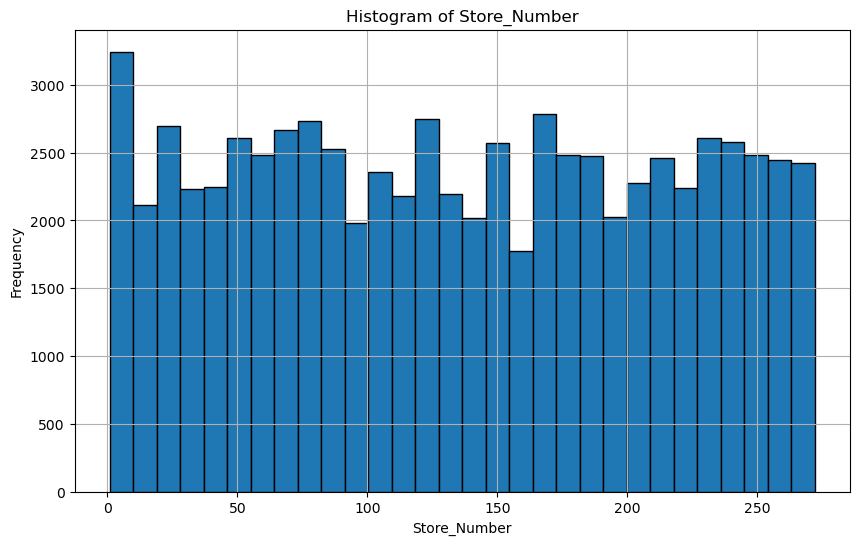

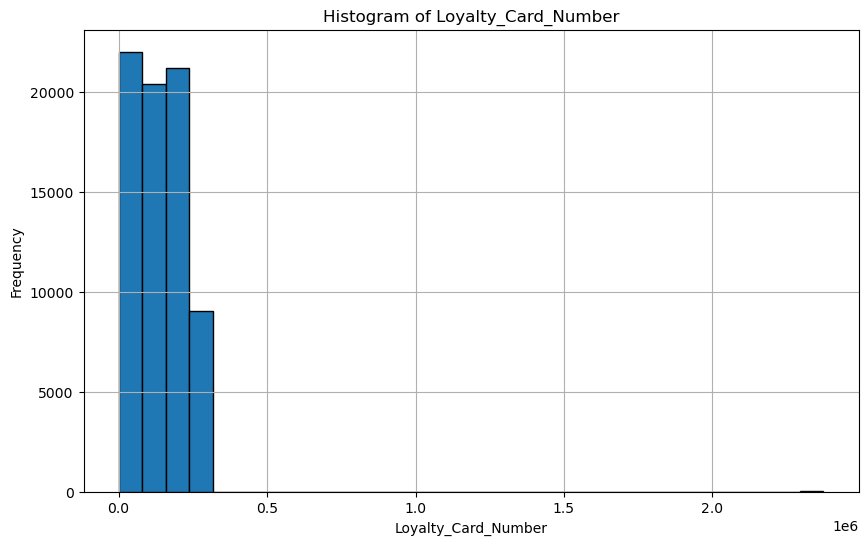

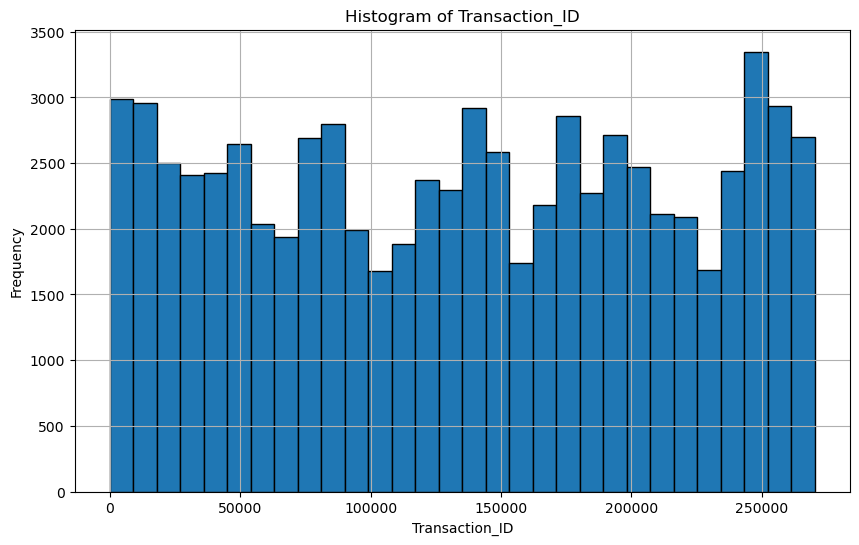

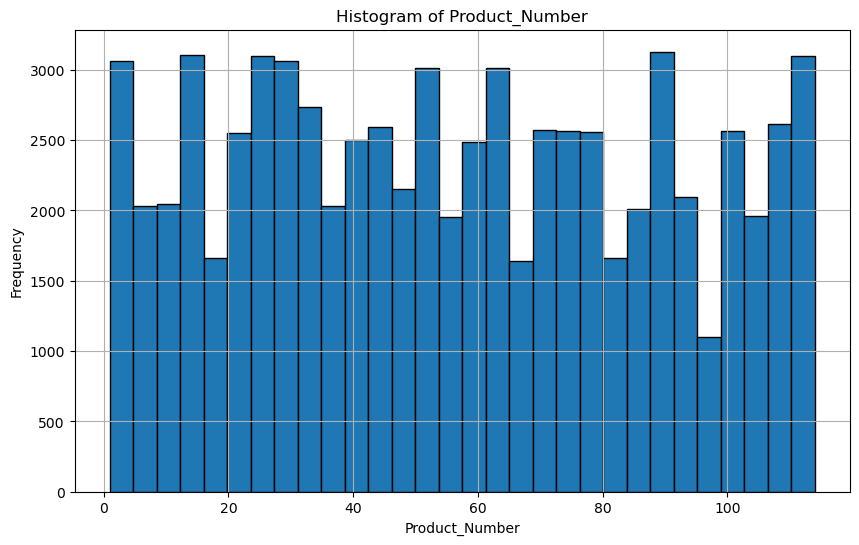

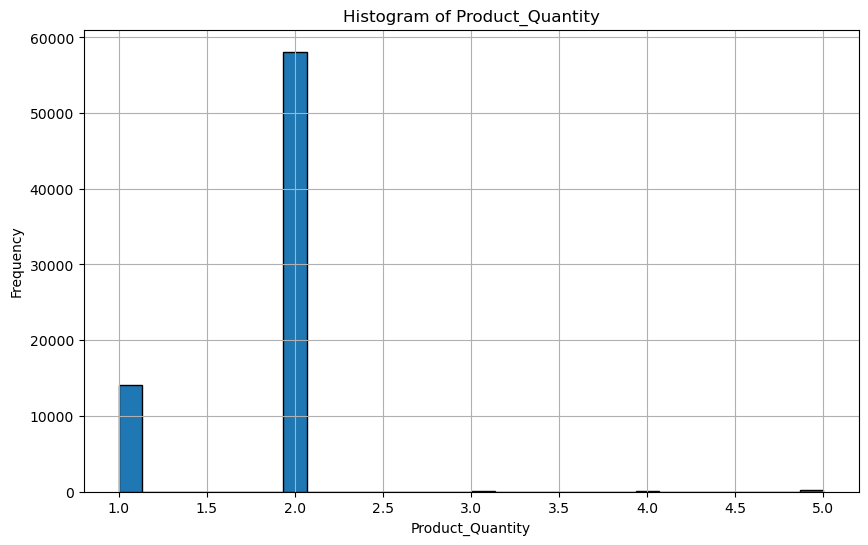

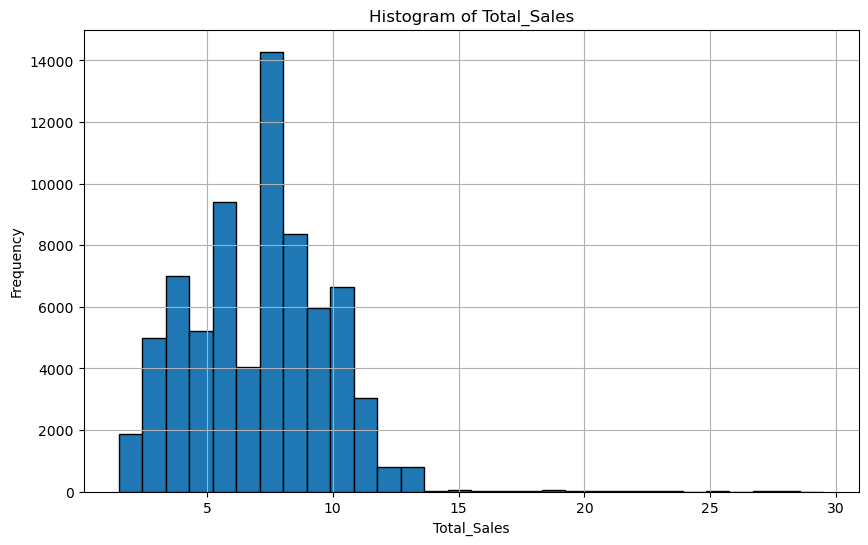

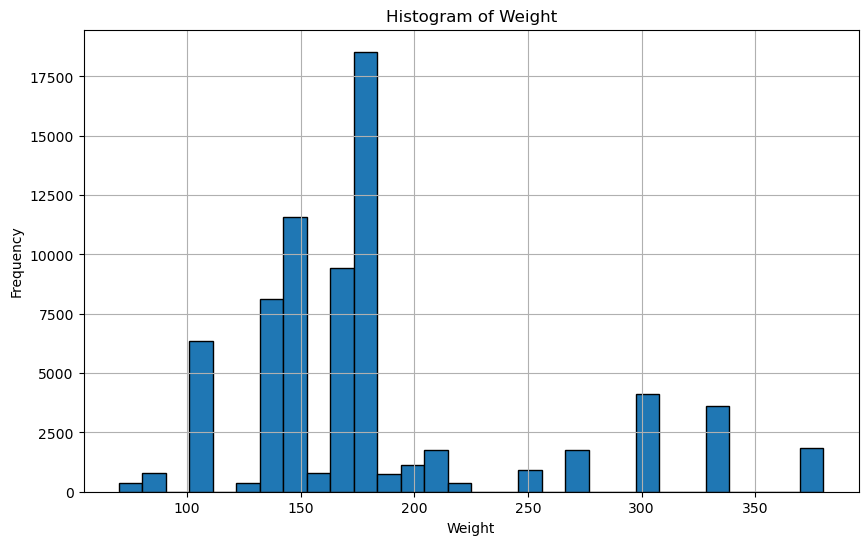

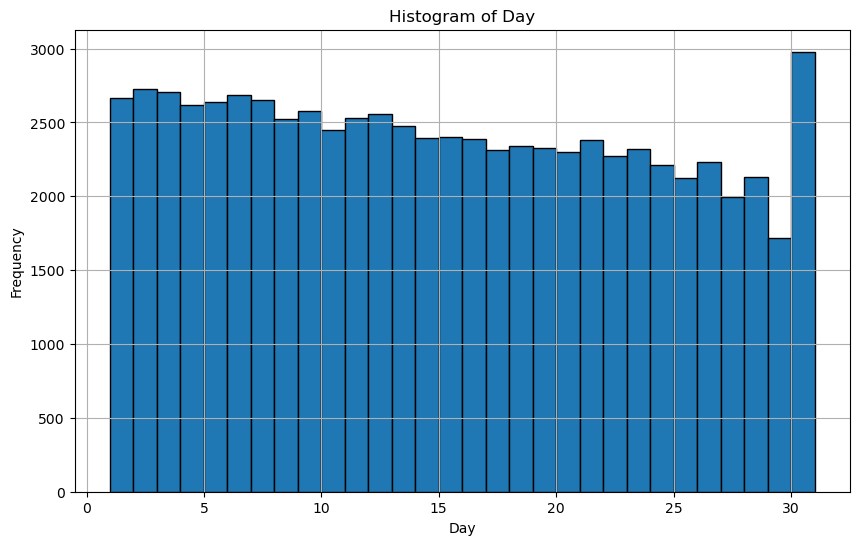

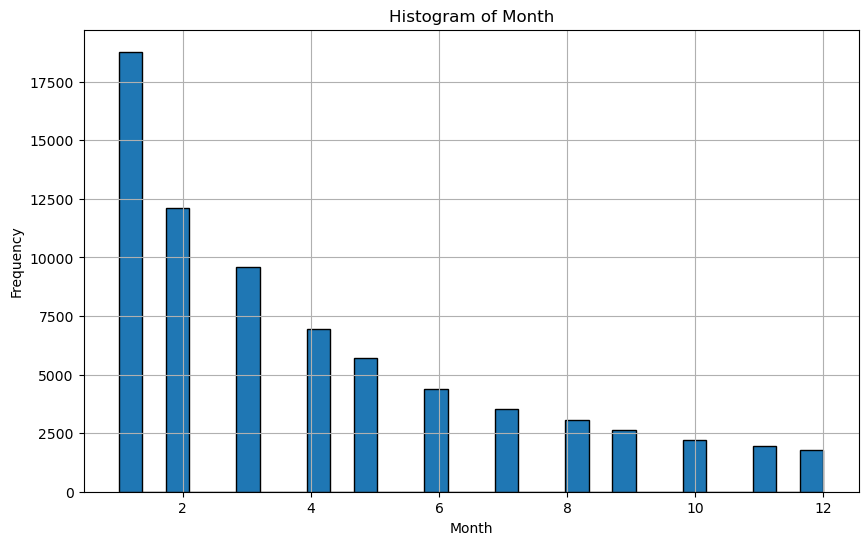

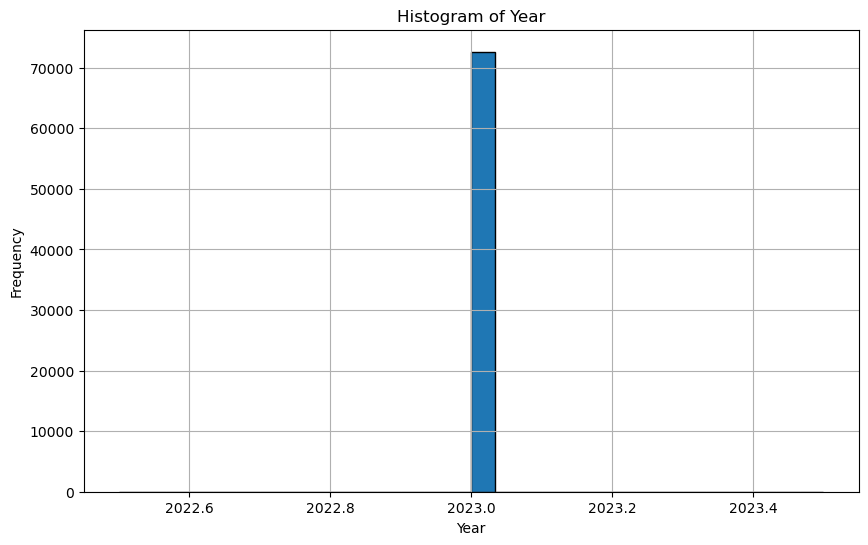

In [84]:
plot_histograms(merged_df, numerical_columns)

10. Plot the bar charts for all categorical variables 
(Note: Plot the frequency of each category in the categorical variables. You should create user defined function for the same) - 15 Marks

In [85]:
def plot_bar_charts(df, categorical_columns):
    for col in categorical_columns:
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar', edgecolor='k')
        plt.title(f'Bar Chart of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

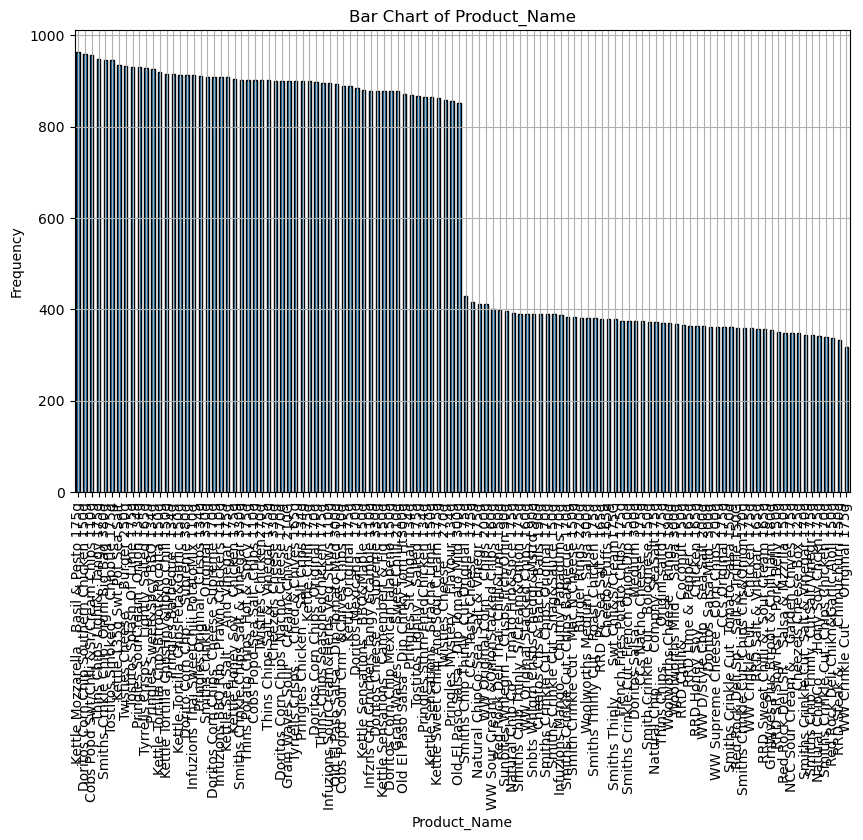

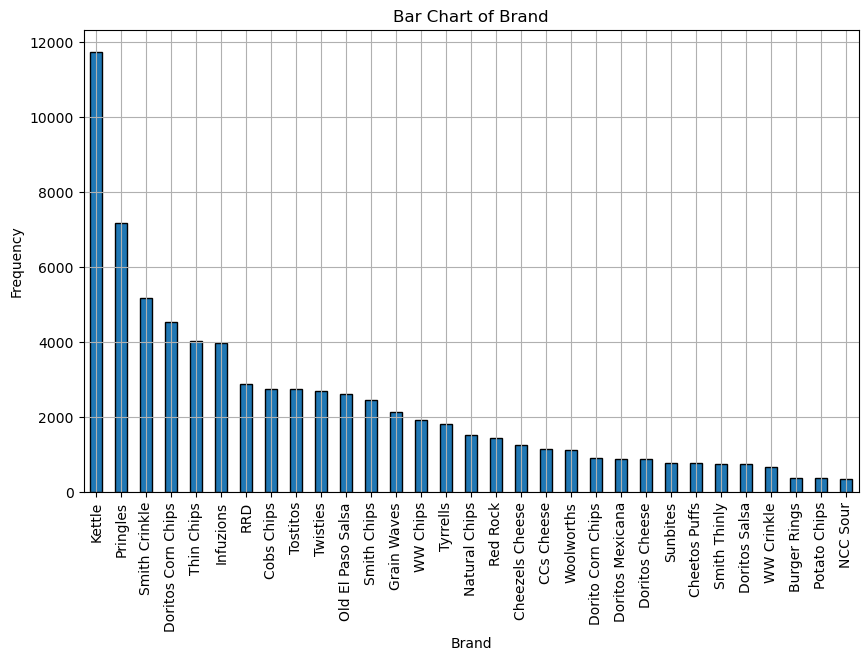

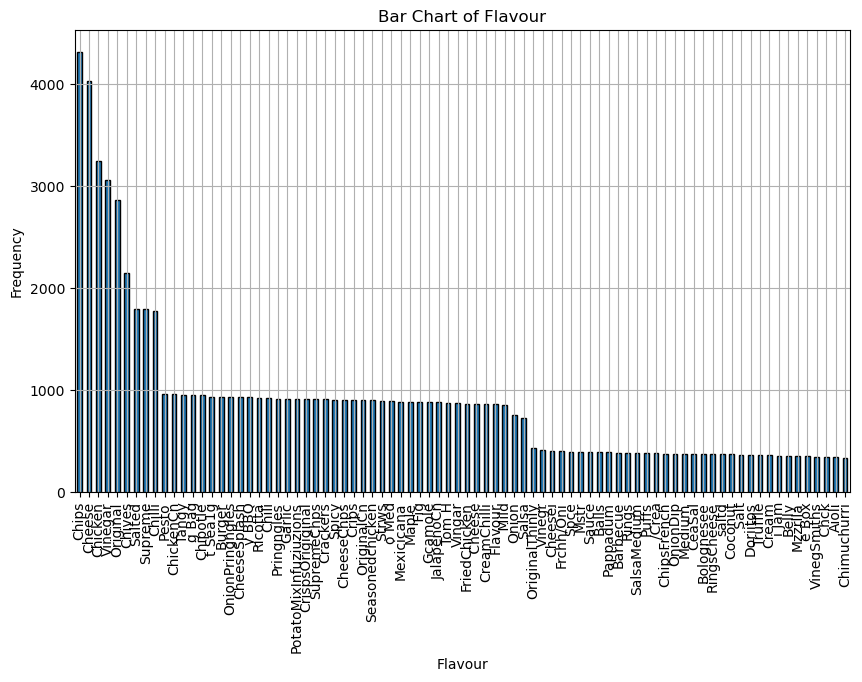

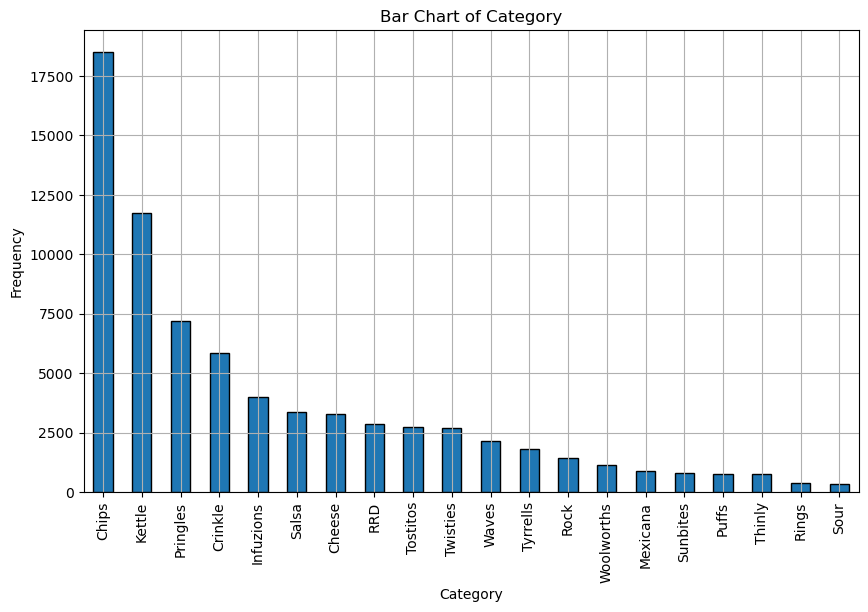

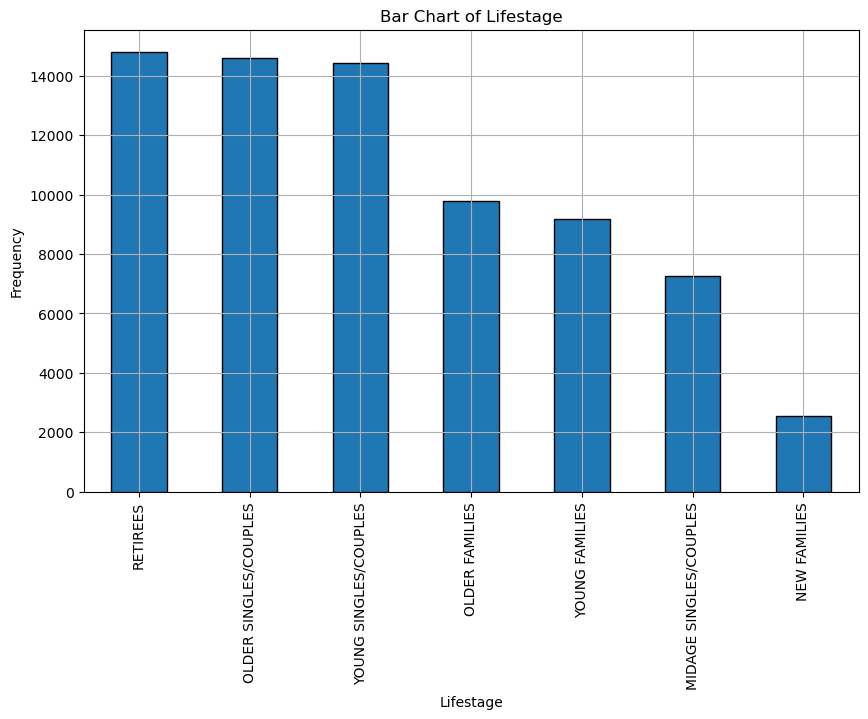

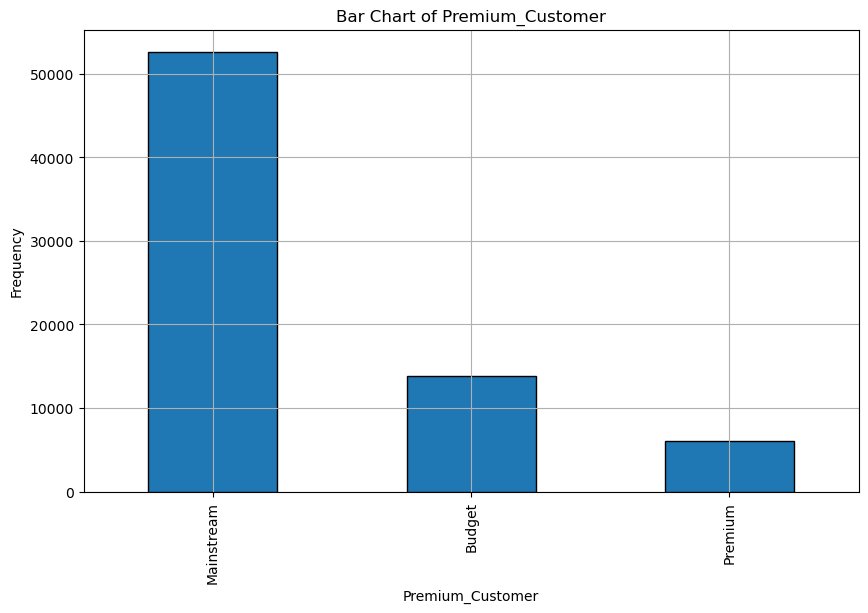

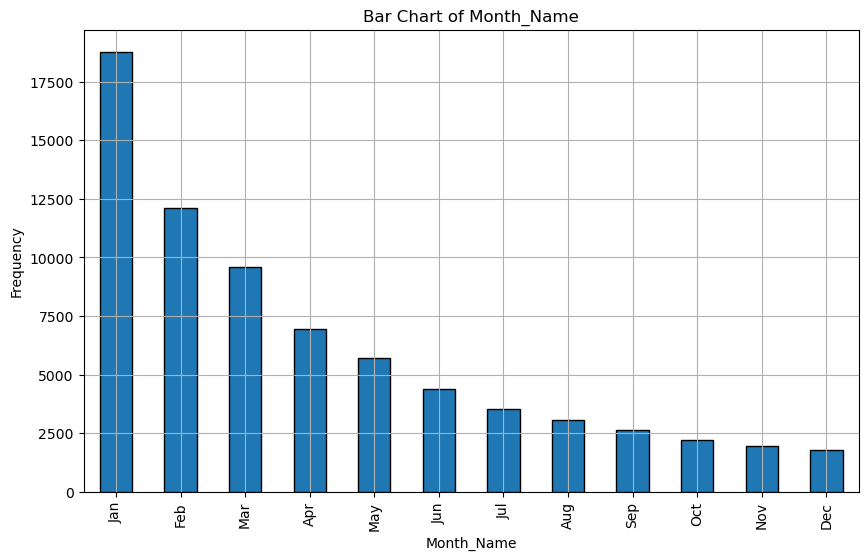

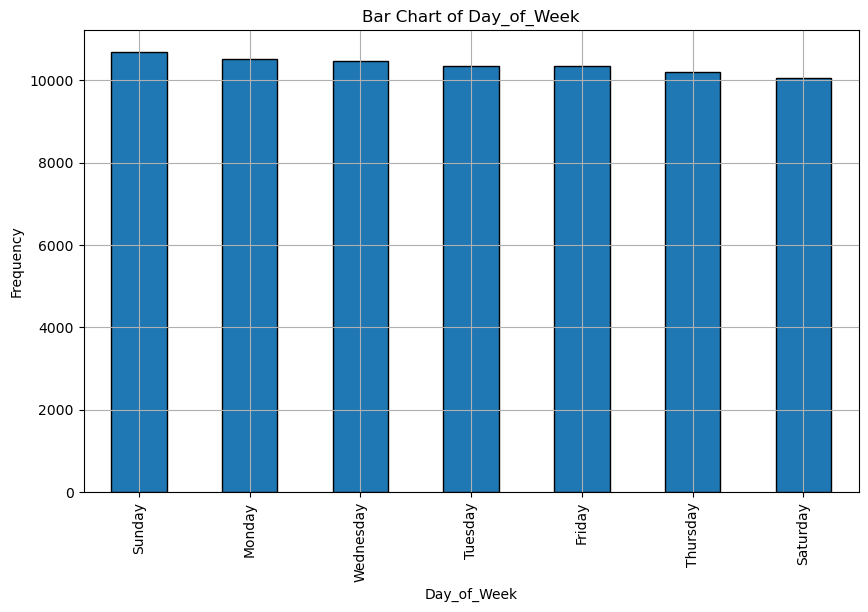

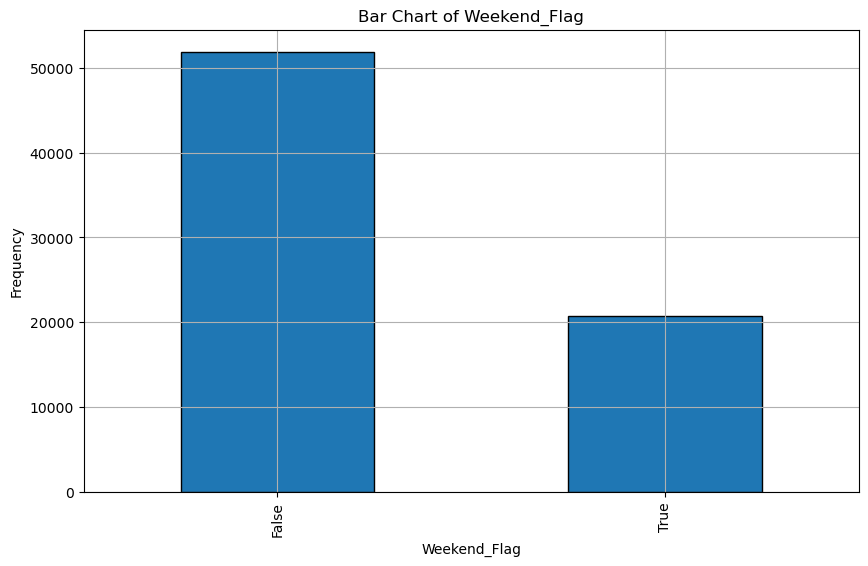

In [86]:
plot_bar_charts(merged_df, categorical_columns)

In [89]:
merged_df.to_csv('Data_1.csv', index=False)

#### Observation & Summaryof Task 1
Data importing done by creating the ipynb file in the same folder.

Data Auditing done by checking the info, describe, null values, unique, dtypes, duplicates, and no null values found in both tables, and dtype of date from transaction tabel is object,

Data cleaning done by removing the duplicated values of LYLTY_CARD_NBR, in the customer table and transaction table by keeping the 1st row, and converted data type of DATE to datetime form objected and formatted to dd-mm-yyyy format, converted the to numerical data of the coloumn (TOT_SALES & Weight) for future calcluations